In [601]:
# Creating DataFrame
# A
a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]
# B
b = [0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0]
# C
c = [0,1,1,1,1,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,1,1,1,0]

In [603]:
# Creating labels
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

In [605]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

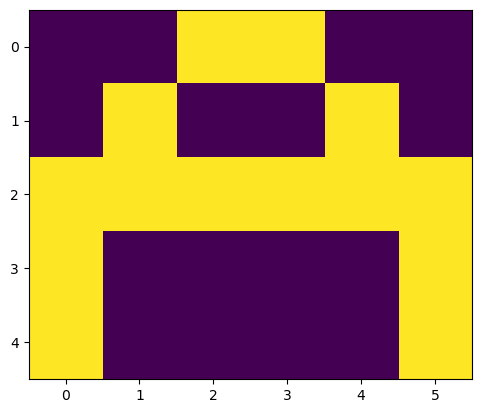

In [607]:
# Visualise the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [609]:
# Convert data into NumPy arrays
x = np.array([np.array(a).reshape(1,30), 
              np.array(b).reshape(1,30), 
              np.array(c).reshape(1,30)])

In [611]:
# Input layer (1, 30)
# Hidden layer (1, 5)
# Output layer (3, 3)

In [613]:
# Activation function
def sigmoid (x):
    x = np.clip(x, -500, 500)
    return (1/(1+np.exp(-x)))

In [615]:
# Initialize weights
def generate_wt(x, y):
    return np.random.randn(x, y)
    

In [617]:
# Feed-forward Neural Network
def f_forword(x, w1, w2):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    return a2

In [619]:
# Loss function (Mean Squared Error)
def loss_fn(out, y):  # Renamed to prevent conflict
    return np.mean(np.square(out - y))

In [621]:
# Backpropagation
def back_prop(x, y, w1, w2, alpha):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = a2 - y
    d1 = np.multiply((w2.dot(d2.T)).T, np.multiply(a1, 1 - a1))

    w1_adj = x.T.dot(d1)
    w2_adj = a1.T.dot(d2)

    w1 -= alpha * w1_adj
    w2 -= alpha * w2_adj

    return w1, w2

In [623]:
# Training function
def train(x, y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_vals = []  

    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forword(x[i], w1, w2)  # Fixed function name
            l.append(loss_fn(out, y[i]))  
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)

        epoch_loss = sum(l) / len(x)
        epoch_acc = (1 - epoch_loss) * 100

        print(f"Epoch {j + 1}: Accuracy = {epoch_acc:.2f}%")

        acc.append(epoch_acc)
        loss_vals.append(epoch_loss)

    return acc, loss_vals, w1, w2

In [641]:
def predict(x, w1, w2):
    out = f_forword(x, w1, w2)  # Run through network
    k = np.argmax(out)  # Get highest probability class

    labels = ["A", "B", "C"]
    
    plt.figure(figsize=(4, 4))
    plt.imshow(x.reshape(5,6))  # Matches yellow contrast
    plt.title(f"Image is of letter {labels[k]}", fontsize=14)
    plt.xticks([])  # Hide axis ticks
    plt.yticks([])
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [643]:
# Initialize Weights
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

In [645]:
# Train Model
acc, loss_vals, w1, w2 = train(x, y, w1, w2, 0.1, 100)

Epoch 1: Accuracy = 61.07%
Epoch 2: Accuracy = 62.58%
Epoch 3: Accuracy = 64.14%
Epoch 4: Accuracy = 65.82%
Epoch 5: Accuracy = 67.53%
Epoch 6: Accuracy = 69.19%
Epoch 7: Accuracy = 70.73%
Epoch 8: Accuracy = 72.08%
Epoch 9: Accuracy = 73.23%
Epoch 10: Accuracy = 74.18%
Epoch 11: Accuracy = 74.95%
Epoch 12: Accuracy = 75.57%
Epoch 13: Accuracy = 76.08%
Epoch 14: Accuracy = 76.51%
Epoch 15: Accuracy = 76.88%
Epoch 16: Accuracy = 77.21%
Epoch 17: Accuracy = 77.52%
Epoch 18: Accuracy = 77.81%
Epoch 19: Accuracy = 78.10%
Epoch 20: Accuracy = 78.39%
Epoch 21: Accuracy = 78.68%
Epoch 22: Accuracy = 78.97%
Epoch 23: Accuracy = 79.27%
Epoch 24: Accuracy = 79.57%
Epoch 25: Accuracy = 79.88%
Epoch 26: Accuracy = 80.20%
Epoch 27: Accuracy = 80.51%
Epoch 28: Accuracy = 80.83%
Epoch 29: Accuracy = 81.16%
Epoch 30: Accuracy = 81.50%
Epoch 31: Accuracy = 81.83%
Epoch 32: Accuracy = 82.17%
Epoch 33: Accuracy = 82.51%
Epoch 34: Accuracy = 82.85%
Epoch 35: Accuracy = 83.19%
Epoch 36: Accuracy = 83.52%
E

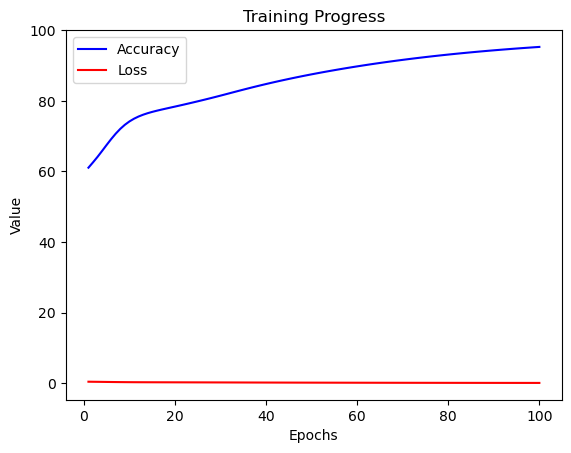

In [647]:
# Visualize Training Progress
plt.plot(range(1, 101), acc, label="Accuracy", color="b")
plt.plot(range(1, 101), loss_vals, label="Loss", color="r")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.title("Training Progress")
plt.show()

In [649]:
print(w1,"\n",w2)

[[-0.26205804 -0.56805768 -1.19391952  0.80942904  2.13366123]
 [-0.3438282   0.71830901 -0.34423215 -1.16272661  0.19080569]
 [ 0.14264602  0.16850004  1.02933621 -0.4466074  -1.24746504]
 [ 1.1454839  -0.69757337  0.36725996 -0.3053215  -1.67463726]
 [ 0.85197308  1.61976893  0.87257432  0.83597158  0.02870923]
 [ 0.07092397  1.01357691 -0.68254572  0.45761095  1.74880291]
 [ 0.65066999 -0.85931578  1.25822802 -1.25639276 -0.18061439]
 [-0.12320872  0.26496518  0.65044946 -0.34637718  0.36493894]
 [-0.28016801  0.56087881  1.33747185  0.23254868 -0.31203364]
 [ 0.07595352  0.97988949  0.4101786   1.02715423 -1.72854406]
 [ 0.58065976 -1.67530479 -0.73085558  1.06018063 -1.7220551 ]
 [-0.72235401  0.15658297  0.84726532 -1.1236906  -0.26067943]
 [ 0.35227577 -0.69981957  1.5251539   0.66114076 -0.56026989]
 [ 0.21593344  0.14533063 -0.52857789  1.43210322 -1.46236343]
 [-0.70231993 -2.90158538 -0.38893713 -0.61888663 -2.2563985 ]
 [ 0.08773786 -1.23294371 -0.24079002  1.06423386 -0.03

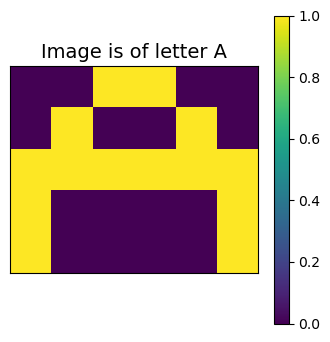

In [651]:
# Prediction function
predict(x[0],w1,w2)

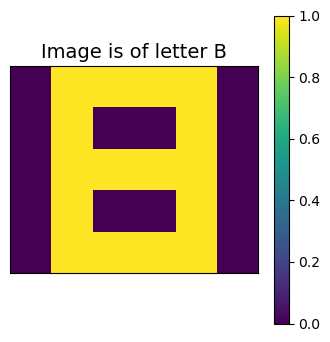

In [653]:
# Prediction function
predict(x[1],w1,w2)

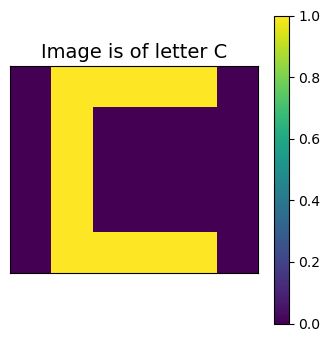

In [655]:
# Prediction function
predict(x[2],w1,w2)